### Exploratory Data Analysis with Python

We will explore the NYC MTA turnstile data set. These data files are from the New York Subway. It tracks the hourly entries and exits to turnstiles (UNIT) by day in the subway system.

Here is an [example of what you could do with the data](https://jameskao.me/analyzing-the-nyc-subway-dataset/). James Kao investigates how subway ridership is affected by incidence of rain.

## Exercise 1

- Download at least 2 weeks worth of [MTA turnstile data](http://web.mta.info/developers/turnstile.html) (You can do this manually or via Python)
- Open up a file, use csv reader to read it, make a python dict where there is a key for each (C/A, UNIT, SCP, STATION). These are the first four columns. The value for this key should be a list of lists. Each list in the list is the rest of the columns in a row. For example, one key-value pair should look like


        {    ('A002','R051','02-00-00','LEXINGTON AVE'):    
             [
               ['NQR456', 'BMT', '01/03/2015', '03:00:00', 'REGULAR', '0004945474', '0001675324'],          
                 ['NQR456', 'BMT', '01/03/2015', '07:00:00', 'REGULAR', '0004945478', '0001675333'],  
                ['NQR456', 'BMT', '01/03/2015', '11:00:00', 'REGULAR', '0004945515', '0001675364'],
              ...   
         ] 
        }

*Store all the weeks in a data structure of your choosing*

In [1]:
import wget

url_template = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_%s.txt'
for date in ['170902', '170909', '170916']:
    url = url_template % date
    wget.download(url)
    print(date, 'file downloaded')

170902 file downloaded
170909 file downloaded
170916 file downloaded


In [2]:
import csv, glob
from collections import defaultdict

def read_csv(file):
    turnstile_reading = defaultdict(list)
    
    with open(file, 'r') as csv_file:
        mta_reader = csv.reader(csv_file)
        
        for i, row in enumerate(mta_reader):
            if i == 0:
                continue
            
            turnstile_info = tuple(row[:4])
            count_reading = row[4:]
            turnstile_reading[turnstile_info].append(count_reading)
    
    return turnstile_reading

In [3]:
weekly_data_dicts = [read_csv(csvfile) for csvfile in glob.glob('turnstile_*.txt')]

In [4]:
from pprint import pprint

sample_dict = list(weekly_data_dicts[0].items())[:2]
pprint(sample_dict)

[(('A002', 'R051', '02-00-00', '59 ST'),
  [['NQR456W',
    'BMT',
    '08/26/2017',
    '00:00:00',
    'REGULAR',
    '0006303202',
    '0002133729                                            '],
   ['NQR456W',
    'BMT',
    '08/26/2017',
    '04:00:00',
    'REGULAR',
    '0006303225',
    '0002133730                                            '],
   ['NQR456W',
    'BMT',
    '08/26/2017',
    '08:00:00',
    'REGULAR',
    '0006303237',
    '0002133753                                            '],
   ['NQR456W',
    'BMT',
    '08/26/2017',
    '12:00:00',
    'REGULAR',
    '0006303309',
    '0002133830                                            '],
   ['NQR456W',
    'BMT',
    '08/26/2017',
    '16:00:00',
    'REGULAR',
    '0006303508',
    '0002133882                                            '],
   ['NQR456W',
    'BMT',
    '08/26/2017',
    '20:00:00',
    'REGULAR',
    '0006303739',
    '0002133926                                            '],
   ['NQR456W',
    'BMT

## Exercise 2
- Let's turn this into a time series.

 For each key (basically the control area, unit, device address and station of a specific turnstile), have a list again, but let the list be comprised of just the point in time and the cumulative count of entries.

This basically means keeping only the date, time, and entries fields in each list. You can convert the date and time into datetime objects -- That is a python class that represents a point in time. You can combine the date and time fields into a string and use the [dateutil](https://dateutil.readthedocs.io/en/stable/) module to convert it into a datetime object.

Your new dict should look something like
 
    {    ('A002','R051','02-00-00','LEXINGTON AVE'):    
             [
                [datetime.datetime(2013, 3, 2, 3, 0), 3788],
                [datetime.datetime(2013, 3, 2, 7, 0), 2585],
                [datetime.datetime(2013, 3, 2, 12, 0), 10653],
                [datetime.datetime(2013, 3, 2, 17, 0), 11016],
                [datetime.datetime(2013, 3, 2, 23, 0), 10666],
                [datetime.datetime(2013, 3, 3, 3, 0), 10814],
                [datetime.datetime(2013, 3, 3, 7, 0), 10229],
                ...
              ],
     ....
     }



In [5]:
from datetime import datetime
from dateutil.parser import parse

def convert_to_time_series(week_data_dict):
    time_series = defaultdict(list)
    
    for i, (turnstile, row_data) in enumerate(week_data_dict.items()):
        if i % 100 == 0:
            print('Processing turnstile ', turnstile)
            
        for lines, division, datestr, timestr, event, cum_entries, cum_exits in row_data:
            timestamp = parse('%sT%s' %(datestr, timestr))
            time_series[turnstile].append([timestamp, int(cum_entries)])
            
    return time_series

In [6]:
weekly_time_series = list(map(convert_to_time_series, weekly_data_dicts))

Processing turnstile  ('A002', 'R051', '02-00-00', '59 ST')
Processing turnstile  ('A030', 'R083', '01-06-00', '23 ST')
Processing turnstile  ('A049', 'R088', '02-01-01', 'CORTLANDT ST')
Processing turnstile  ('A084', 'R125', '01-03-00', 'BROAD ST')
Processing turnstile  ('B024', 'R211', '00-05-00', 'KINGS HWY')
Processing turnstile  ('C012', 'R258', '01-03-02', '4AV-9 ST')
Processing turnstile  ('E005', 'R247', '00-00-01', '55 ST')
Processing turnstile  ('H009', 'R235', '00-06-01', 'BEDFORD AV')
Processing turnstile  ('JFK02', 'R535', '01-00-01', 'HOWARD BCH JFK')
Processing turnstile  ('J034', 'R007', '00-00-03', '104 ST')
Processing turnstile  ('N017', 'R331', '00-00-03', '155 ST')
Processing turnstile  ('N051', 'R084', '02-00-02', '59 ST COLUMBUS')
Processing turnstile  ('N070', 'R012', '04-00-01', '34 ST-PENN STA')
Processing turnstile  ('N090', 'R139', '01-05-00', 'CANAL ST')
Processing turnstile  ('N103', 'R127', '00-02-00', 'JAY ST-METROTEC')
Processing turnstile  ('N128', 'R20

Processing turnstile  ('PTH22', 'R540', '02-02-05', 'PATH NEW WTC')
Processing turnstile  ('R116', 'R030', '00-05-01', 'CHAMBERS ST')
Processing turnstile  ('R138', 'R293', '00-03-02', '34 ST-PENN STA')
Processing turnstile  ('R159', 'R164', '01-00-00', '66 ST-LINCOLN')
Processing turnstile  ('R172', 'R192', '00-00-02', 'CATHEDRAL PKWY')
Processing turnstile  ('R200A', 'R041', '01-05-00', 'BOWLING GREEN')
Processing turnstile  ('R217A', 'R194', '00-05-02', 'BLEECKER ST')
Processing turnstile  ('R236', 'R045', '00-06-01', 'GRD CNTRL-42 ST')
Processing turnstile  ('R245', 'R051', '00-05-00', '59 ST')
Processing turnstile  ('R259', 'R307', '00-00-00', '138/GRAND CONC')
Processing turnstile  ('R304', 'R206', '00-00-02', '125 ST')
Processing turnstile  ('R328', 'R361', '00-05-00', 'PELHAM PKWY')
Processing turnstile  ('R416', 'R245', '00-05-00', 'ST LAWRENCE AV')
Processing turnstile  ('R510', 'R090', '00-00-02', '39 AV')
Processing turnstile  ('R526', 'R096', '00-05-03', '82 ST-JACKSON H')

In [7]:
sample = list(weekly_time_series[0].items())[:5]
pprint(sample)

[(('A002', 'R051', '02-00-00', '59 ST'),
  [[datetime.datetime(2017, 8, 26, 0, 0), 6303202],
   [datetime.datetime(2017, 8, 26, 4, 0), 6303225],
   [datetime.datetime(2017, 8, 26, 8, 0), 6303237],
   [datetime.datetime(2017, 8, 26, 12, 0), 6303309],
   [datetime.datetime(2017, 8, 26, 16, 0), 6303508],
   [datetime.datetime(2017, 8, 26, 20, 0), 6303739],
   [datetime.datetime(2017, 8, 27, 0, 0), 6303877],
   [datetime.datetime(2017, 8, 27, 4, 0), 6303900],
   [datetime.datetime(2017, 8, 27, 8, 0), 6303908],
   [datetime.datetime(2017, 8, 27, 12, 0), 6303971],
   [datetime.datetime(2017, 8, 27, 16, 0), 6304096],
   [datetime.datetime(2017, 8, 27, 20, 0), 6304278],
   [datetime.datetime(2017, 8, 28, 0, 0), 6304389],
   [datetime.datetime(2017, 8, 28, 4, 0), 6304397],
   [datetime.datetime(2017, 8, 28, 8, 0), 6304432],
   [datetime.datetime(2017, 8, 28, 12, 0), 6304573],
   [datetime.datetime(2017, 8, 28, 16, 0), 6304829],
   [datetime.datetime(2017, 8, 28, 20, 0), 6305476],
   [datetime.d

## Exercise 3
- These counts are cumulative every n hours. We want total daily entries. 

Now make it that we again have the same keys, but now we have a single value for a single day, which is not cumulative counts but the total number of passengers that entered through this turnstile on this day.


In [8]:
def combine_weeks(weekly_time_series):
    combined = defaultdict(list)
    
    for week in weekly_time_series:
        for turnstile, time_series in week.items():
            combined[turnstile] += time_series
            
    return combined

In [9]:
combined_time_series = combine_weeks(weekly_time_series)

In [10]:
list(combined_time_series.items())[:5]

[(('A002', 'R051', '02-00-00', '59 ST'),
  [[datetime.datetime(2017, 8, 26, 0, 0), 6303202],
   [datetime.datetime(2017, 8, 26, 4, 0), 6303225],
   [datetime.datetime(2017, 8, 26, 8, 0), 6303237],
   [datetime.datetime(2017, 8, 26, 12, 0), 6303309],
   [datetime.datetime(2017, 8, 26, 16, 0), 6303508],
   [datetime.datetime(2017, 8, 26, 20, 0), 6303739],
   [datetime.datetime(2017, 8, 27, 0, 0), 6303877],
   [datetime.datetime(2017, 8, 27, 4, 0), 6303900],
   [datetime.datetime(2017, 8, 27, 8, 0), 6303908],
   [datetime.datetime(2017, 8, 27, 12, 0), 6303971],
   [datetime.datetime(2017, 8, 27, 16, 0), 6304096],
   [datetime.datetime(2017, 8, 27, 20, 0), 6304278],
   [datetime.datetime(2017, 8, 28, 0, 0), 6304389],
   [datetime.datetime(2017, 8, 28, 4, 0), 6304397],
   [datetime.datetime(2017, 8, 28, 8, 0), 6304432],
   [datetime.datetime(2017, 8, 28, 12, 0), 6304573],
   [datetime.datetime(2017, 8, 28, 16, 0), 6304829],
   [datetime.datetime(2017, 8, 28, 20, 0), 6305476],
   [datetime.d

In [11]:
def convert_to_daily_time_series(combined_time_series):
    turnstile_daily_time_series = {}
    
    for i, (turnstile, time_series) in enumerate(combined_time_series.items()):
        print('Processing turnstile ', turnstile)
        turnstile_daily_time_series[turnstile] = daily_calculation(time_series)
        
    return turnstile_daily_time_series

In [12]:
from itertools import groupby

def count_within_normal_bounds(count):
    if count is None:
        return True
    else:
        return 10000 > count >= 0

def daily_calculation(time_series):
    daily_time_series = []
    
    def day_of_timestamp(entry):
        timestamp, tot_entries = entry
        return timestamp.date()
    
    count_on_previous_day = None
    for day, entries_on_this_day in groupby(time_series, key = day_of_timestamp):
        cum_entry_count_on_day = max([count for time, count in entries_on_this_day])
        
        if count_on_previous_day is None:
            daily_entries = None
        else:
            daily_entries = cum_entry_count_on_day - count_on_previous_day
            
        count_on_previous_day = cum_entry_count_on_day
        
        if count_within_normal_bounds(daily_entries):
            daily_time_series.append((day, daily_entries))
        else:
            print('Warning: Abnormal entry count found on day %s: %s' % (day, daily_entries))
            daily_time_series.append((day, None))
            
    return daily_time_series

In [13]:
daily_time_series = convert_to_daily_time_series(combined_time_series)

Processing turnstile  ('A002', 'R051', '02-00-00', '59 ST')
Processing turnstile  ('A002', 'R051', '02-00-01', '59 ST')
Processing turnstile  ('A002', 'R051', '02-03-00', '59 ST')
Processing turnstile  ('A002', 'R051', '02-03-01', '59 ST')
Processing turnstile  ('A002', 'R051', '02-03-02', '59 ST')
Processing turnstile  ('A002', 'R051', '02-03-03', '59 ST')
Processing turnstile  ('A002', 'R051', '02-03-04', '59 ST')
Processing turnstile  ('A002', 'R051', '02-03-05', '59 ST')
Processing turnstile  ('A002', 'R051', '02-03-06', '59 ST')
Processing turnstile  ('A002', 'R051', '02-05-00', '59 ST')
Processing turnstile  ('A002', 'R051', '02-05-01', '59 ST')
Processing turnstile  ('A002', 'R051', '02-06-00', '59 ST')
Processing turnstile  ('A006', 'R079', '00-00-00', '5 AV/59 ST')
Processing turnstile  ('A006', 'R079', '00-00-01', '5 AV/59 ST')
Processing turnstile  ('A006', 'R079', '00-00-02', '5 AV/59 ST')
Processing turnstile  ('A006', 'R079', '00-00-03', '5 AV/59 ST')
Processing turnstile

Processing turnstile  ('C008', 'R099', '00-06-00', 'DEKALB AV')
Processing turnstile  ('C008', 'R099', '00-06-01', 'DEKALB AV')
Processing turnstile  ('C008', 'R099', '00-06-02', 'DEKALB AV')
Processing turnstile  ('C009', 'R057', '03-00-00', 'ATL AV-BARCLAY')
Processing turnstile  ('C009', 'R057', '03-00-01', 'ATL AV-BARCLAY')
Processing turnstile  ('C009', 'R057', '03-00-02', 'ATL AV-BARCLAY')
Processing turnstile  ('C009', 'R057', '03-00-03', 'ATL AV-BARCLAY')
Processing turnstile  ('C009', 'R057', '03-03-00', 'ATL AV-BARCLAY')
Processing turnstile  ('C009', 'R057', '03-03-01', 'ATL AV-BARCLAY')
Processing turnstile  ('C009', 'R057', '03-03-02', 'ATL AV-BARCLAY')
Processing turnstile  ('C009', 'R057', '03-03-03', 'ATL AV-BARCLAY')
Processing turnstile  ('C009', 'R057', '03-05-00', 'ATL AV-BARCLAY')
Processing turnstile  ('C009', 'R057', '03-05-01', 'ATL AV-BARCLAY')
Processing turnstile  ('C010', 'R231', '00-00-00', 'UNION ST')
Processing turnstile  ('C010', 'R231', '00-00-01', 'UNI

Processing turnstile  ('N090', 'R139', '01-03-00', 'CANAL ST')
Processing turnstile  ('N090', 'R139', '01-05-00', 'CANAL ST')
Processing turnstile  ('N090', 'R139', '01-06-00', 'CANAL ST')
Processing turnstile  ('N090', 'R139', '01-06-01', 'CANAL ST')
Processing turnstile  ('N091', 'R029', '02-00-00', 'CHAMBERS ST')
Processing turnstile  ('N091', 'R029', '02-00-01', 'CHAMBERS ST')
Processing turnstile  ('N091', 'R029', '02-00-02', 'CHAMBERS ST')
Processing turnstile  ('N091', 'R029', '02-00-03', 'CHAMBERS ST')
Processing turnstile  ('N091', 'R029', '02-00-04', 'CHAMBERS ST')
Processing turnstile  ('N091', 'R029', '02-00-05', 'CHAMBERS ST')
Processing turnstile  ('N091', 'R029', '02-05-00', 'CHAMBERS ST')
Processing turnstile  ('N091', 'R029', '02-05-01', 'CHAMBERS ST')
Processing turnstile  ('N091', 'R029', '02-05-02', 'CHAMBERS ST')
Processing turnstile  ('N091', 'R029', '02-05-03', 'CHAMBERS ST')
Processing turnstile  ('N091', 'R029', '02-05-04', 'CHAMBERS ST')
Processing turnstile  

Processing turnstile  ('N506', 'R022', '00-05-05', '34 ST-HERALD SQ')
Processing turnstile  ('N506', 'R022', '00-06-00', '34 ST-HERALD SQ')
Processing turnstile  ('N506', 'R022', '00-06-01', '34 ST-HERALD SQ')
Processing turnstile  ('N507', 'R023', '00-00-00', '34 ST-HERALD SQ')
Processing turnstile  ('N507', 'R023', '00-00-01', '34 ST-HERALD SQ')
Processing turnstile  ('N507', 'R023', '00-00-02', '34 ST-HERALD SQ')
Processing turnstile  ('N507', 'R023', '00-00-03', '34 ST-HERALD SQ')
Processing turnstile  ('N507', 'R023', '00-03-00', '34 ST-HERALD SQ')
Processing turnstile  ('N507', 'R023', '00-03-01', '34 ST-HERALD SQ')
Processing turnstile  ('N507', 'R023', '00-03-02', '34 ST-HERALD SQ')
Processing turnstile  ('N507', 'R023', '00-03-03', '34 ST-HERALD SQ')
Processing turnstile  ('N507', 'R023', '00-03-04', '34 ST-HERALD SQ')
Processing turnstile  ('N507', 'R023', '00-03-05', '34 ST-HERALD SQ')
Processing turnstile  ('N507', 'R023', '00-03-06', '34 ST-HERALD SQ')
Processing turnstile

Processing turnstile  ('R145', 'R032', '00-06-00', 'TIMES SQ-42 ST')
Processing turnstile  ('R145', 'R032', '00-06-01', 'TIMES SQ-42 ST')
Processing turnstile  ('R145', 'R032', '00-06-02', 'TIMES SQ-42 ST')
Processing turnstile  ('R147', 'R033', '04-00-00', 'TIMES SQ-42 ST')
Processing turnstile  ('R147', 'R033', '04-00-01', 'TIMES SQ-42 ST')
Processing turnstile  ('R147', 'R033', '04-00-02', 'TIMES SQ-42 ST')
Processing turnstile  ('R147', 'R033', '04-00-03', 'TIMES SQ-42 ST')
Processing turnstile  ('R147', 'R033', '04-00-04', 'TIMES SQ-42 ST')
Processing turnstile  ('R147', 'R033', '04-00-05', 'TIMES SQ-42 ST')
Processing turnstile  ('R147', 'R033', '04-00-06', 'TIMES SQ-42 ST')
Processing turnstile  ('R147', 'R033', '04-05-00', 'TIMES SQ-42 ST')
Processing turnstile  ('R147', 'R033', '04-05-01', 'TIMES SQ-42 ST')
Processing turnstile  ('R148', 'R033', '01-00-00', 'TIMES SQ-42 ST')
Processing turnstile  ('R148', 'R033', '01-00-01', 'TIMES SQ-42 ST')
Processing turnstile  ('R148', 'R0

Processing turnstile  ('R331', 'R364', '00-00-03', 'GUN HILL RD')
Processing turnstile  ('R331', 'R364', '00-05-00', 'GUN HILL RD')
Processing turnstile  ('R331', 'R364', '00-05-01', 'GUN HILL RD')
Processing turnstile  ('R332', 'R365', '00-00-00', '219 ST')
Processing turnstile  ('R332', 'R365', '00-00-01', '219 ST')
Processing turnstile  ('R332', 'R365', '00-00-02', '219 ST')
Processing turnstile  ('R333', 'R366', '00-00-00', '225 ST')
Processing turnstile  ('R333', 'R366', '00-00-01', '225 ST')
Processing turnstile  ('R333', 'R366', '00-00-02', '225 ST')
Processing turnstile  ('R334', 'R367', '00-00-00', '233 ST')
Processing turnstile  ('R334', 'R367', '00-00-01', '233 ST')
Processing turnstile  ('R334', 'R367', '00-00-02', '233 ST')
Processing turnstile  ('R334', 'R367', '00-05-00', '233 ST')
Processing turnstile  ('R334', 'R367', '00-05-01', '233 ST')
Processing turnstile  ('R335', 'R444', '00-00-00', 'NEREID AV')
Processing turnstile  ('R335', 'R444', '00-00-01', 'NEREID AV')
Pro

In [14]:
pprint(daily_time_series[('PTH11', 'R545', '00-04-01', '14TH STREET')])

[(datetime.date(2017, 8, 26), None),
 (datetime.date(2017, 8, 27), 41),
 (datetime.date(2017, 8, 28), 61),
 (datetime.date(2017, 8, 29), 59),
 (datetime.date(2017, 8, 30), 60),
 (datetime.date(2017, 8, 31), 69),
 (datetime.date(2017, 9, 1), 75),
 (datetime.date(2017, 9, 2), 134),
 (datetime.date(2017, 9, 3), 33),
 (datetime.date(2017, 9, 4), 87),
 (datetime.date(2017, 9, 5), 43),
 (datetime.date(2017, 9, 6), 74),
 (datetime.date(2017, 9, 7), 94),
 (datetime.date(2017, 9, 8), 122),
 (datetime.date(2017, 9, 9), 41),
 (datetime.date(2017, 9, 10), 31),
 (datetime.date(2017, 9, 11), 57),
 (datetime.date(2017, 9, 12), 59),
 (datetime.date(2017, 9, 13), 51),
 (datetime.date(2017, 9, 14), 64),
 (datetime.date(2017, 9, 15), 62)]


## Exercise 4
- We will plot the daily time series for a turnstile.

In ipython notebook, add this to the beginning of your next cell:    

    %matplotlib inline

This will make your matplotlib graphs integrate nicely with the notebook.
To plot the time series, import matplotlib with 

    import matplotlib.pyplot as plt

Take the list of [(date1, count1), (date2, count2), ...], for the turnstile and turn it into two lists:
dates and counts. This should plot it:

    plt.figure(figsize=(10,3))
    plt.plot(dates,counts)


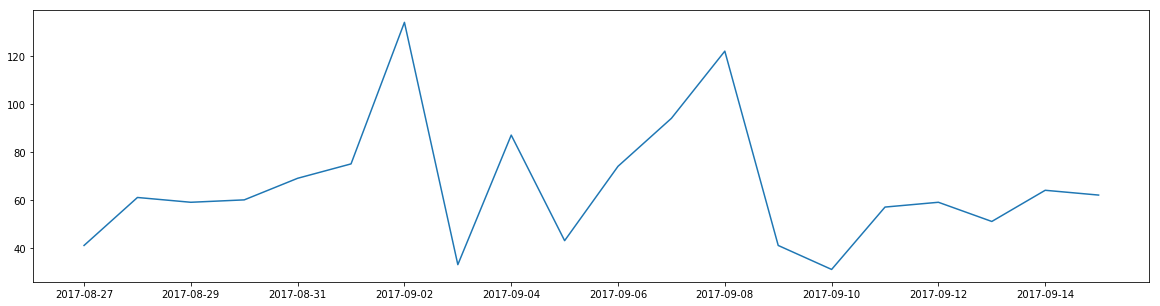

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

time_series = daily_time_series[('PTH11', 'R545', '00-04-01', '14TH STREET')]
days, counts = zip(*time_series)
plt.figure(figsize=(20,5))
plt.plot(days, counts)
plt.show()

## Exercise 5
- So far we've been operating on a single turnstile level, let's combine turnstiles in the same ControlArea/Unit/Station combo. There are some ControlArea/Unit/Station groups that have a single turnstile, but most have multiple turnstilea-- same value for the C/A, UNIT and STATION columns, different values for the SCP column.

We want to combine the numbers together -- for each ControlArea/UNIT/STATION combo, for each day, add the counts from each turnstile belonging to that combo.


In [16]:
from collections import Counter

def booth_of_item(item):
    turnstile, time_series = item
    control_area, unit, device_id, station = turnstile
    return (control_area, unit, station)

def reduce_to_booths(daily_time_series):
    turnstile_time_series_items = sorted(daily_time_series.items())
    booth_to_time_series = {}
    
    for booth, item_list_of_booth in groupby(turnstile_time_series_items, key = booth_of_item):
        daily_counter = Counter()
        
        for turnstile, time_series in item_list_of_booth:
            for day, count in time_series:
                if count is not None:
                    daily_counter[day] += count
                    
            booth_to_time_series[booth] = sorted(daily_counter.items())
            
    return booth_to_time_series

In [17]:
booth_series = reduce_to_booths(daily_time_series)
pprint(booth_series[('PTH11', 'R545', '14TH STREET')])

[(datetime.date(2017, 8, 27), 4138),
 (datetime.date(2017, 8, 28), 9029),
 (datetime.date(2017, 8, 29), 7081),
 (datetime.date(2017, 8, 30), 6849),
 (datetime.date(2017, 8, 31), 10043),
 (datetime.date(2017, 9, 1), 9295),
 (datetime.date(2017, 9, 2), 4536),
 (datetime.date(2017, 9, 3), 3695),
 (datetime.date(2017, 9, 4), 3966),
 (datetime.date(2017, 9, 5), 8263),
 (datetime.date(2017, 9, 6), 9829),
 (datetime.date(2017, 9, 7), 10250),
 (datetime.date(2017, 9, 8), 9110),
 (datetime.date(2017, 9, 9), 5985),
 (datetime.date(2017, 9, 10), 5120),
 (datetime.date(2017, 9, 11), 9493),
 (datetime.date(2017, 9, 12), 9441),
 (datetime.date(2017, 9, 13), 8587),
 (datetime.date(2017, 9, 14), 7910),
 (datetime.date(2017, 9, 15), 9075)]


## Exercise 6
- Similarly, combine everything in each station, and come up with a time series of `[(date1, count1),(date2,count2),...]` type of time series for each STATION, by adding up all the turnstiles in a station.

In [18]:
def station_of_item(item):
    booth, time_series = item
    control_area, unit, station = booth
    return station

def reduce_to_station(booth_series):
    booth_time_series_items = sorted(booth_series.items())
    station_to_time_series = {}
    
    for station, item_list_of_station in groupby(booth_time_series_items, key = station_of_item):
        daily_counter = Counter()
        
        for turnstile, time_series in item_list_of_station:
            for day, count in time_series:
                daily_counter[day] += count
                    
            station_to_time_series[station] = sorted(daily_counter.items())
            
    return station_to_time_series

In [19]:
station_series = reduce_to_station(booth_series)
pprint(station_series['14TH STREET'])

[(datetime.date(2017, 8, 27), 4138),
 (datetime.date(2017, 8, 28), 9029),
 (datetime.date(2017, 8, 29), 7081),
 (datetime.date(2017, 8, 30), 6849),
 (datetime.date(2017, 8, 31), 10043),
 (datetime.date(2017, 9, 1), 9295),
 (datetime.date(2017, 9, 2), 4536),
 (datetime.date(2017, 9, 3), 3695),
 (datetime.date(2017, 9, 4), 3966),
 (datetime.date(2017, 9, 5), 8263),
 (datetime.date(2017, 9, 6), 9829),
 (datetime.date(2017, 9, 7), 10250),
 (datetime.date(2017, 9, 8), 9110),
 (datetime.date(2017, 9, 9), 5985),
 (datetime.date(2017, 9, 10), 5120),
 (datetime.date(2017, 9, 11), 9493),
 (datetime.date(2017, 9, 12), 9441),
 (datetime.date(2017, 9, 13), 8587),
 (datetime.date(2017, 9, 14), 7910),
 (datetime.date(2017, 9, 15), 9075)]


## Exercise 7
- Plot the time series for a station

In [20]:
def plot_station(station_name, station_series):
    time_series = station_series[station_name]
    days, counts = zip(*time_series)
    plt.figure(figsize=(15,5))
    plt.plot(days, counts)
    plt.xlabel('Date')
    plt.ylabel('Number of turnstile entries')
    plt.title('Daily entries for station %s' % station_name)

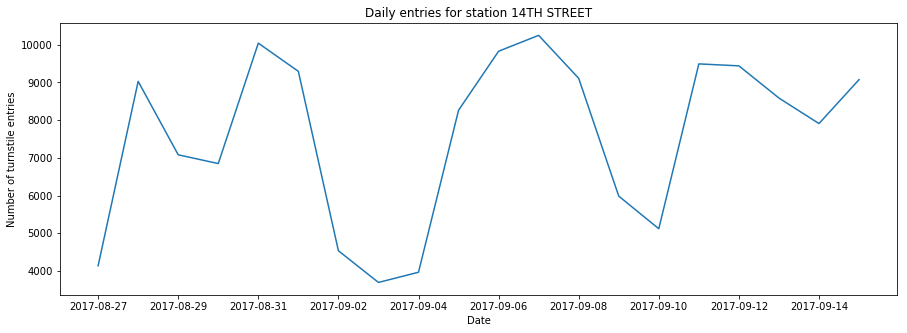

In [21]:
plot_station('14TH STREET', station_series)

## Exercise 8
- Make one list of counts for **one** week for one station. Monday's count, Tuesday's count, etc. so it's a list of 7 counts.
Make the same list for another week, and another week, and another week.
`plt.plot(week_count_list)` for every `week_count_list` you created this way. You should get a rainbow plot of weekly commute numbers on top of each other.



In [22]:
import numpy as np

def separate_weeks(time_series):
    time_series_for_each_week = []
    week = []
    
    for i, (day, count) in enumerate(time_series):
        week.append((day, count))
        
        if i % 7 == 6:
            time_series_for_each_week.append(week)
            week = []
    
    time_series_for_each_week.append(week)
    return time_series_for_each_week

def rainbow_plot(station_name, station_series):
    time_series = station_series[station_name]
    time_series_for_each_week = separate_weeks(time_series)
    
    plt.figure(figsize=(15,5))
    for week in time_series_for_each_week:
        days, counts = zip(*week)
        days = range(len(counts))
        plt.plot(days, counts)
        
    plt.xlabel('Day of the Week')
    plt.ylabel('Number of Turnstile Entries')
    plt.xticks(np.arange(7), ['St', 'Sn', 'Mo', 'Tu', 'We', 'Th', 'Fr'])
    plt.title('Ridership per day for station %s' % station_name)

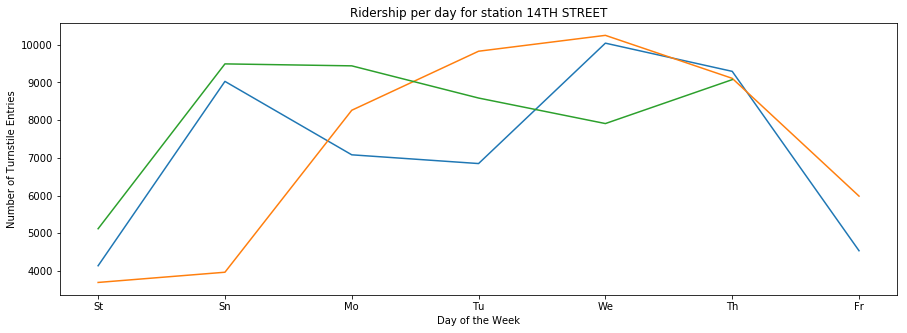

In [23]:
rainbow_plot('14TH STREET', station_series)

## Exercise 9
- Over multiple weeks, sum total ridership for each station and sort them, so you can find out the stations with the highest traffic during the time you investigate

In [24]:
def station_total_traffic(item):
    station, time_series = item
    total = sum([count for day, count in time_series])
    return total, station

In [25]:
traffic_report = list(map(station_total_traffic, station_series.items()))

In [26]:
for total_traffic, station in sorted(traffic_report, reverse = True)[:30]:
    print('%-18s %s' % (station, total_traffic))

GRD CNTRL-42 ST    2363487
42 ST-PORT AUTH    1556298
TIMES SQ-42 ST     1512445
34 ST-PENN STA     1360700
34 ST-HERALD SQ    1202183
FLUSHING-MAIN      1068963
PATH NEW WTC       898237
47-50 STS ROCK     872754
JKSN HT-ROOSVLT    865797
86 ST              747567
W 4 ST-WASH SQ     746542
JAY ST-METROTEC    705750
59 ST              692674
42 ST-BRYANT PK    664197
JAMAICA CENTER     640034
72 ST              626107
LEXINGTON AV/53    588304
14 ST-UNION SQ     568013
BOROUGH HALL       564751
57 ST-7 AV         550822
BEDFORD AV         544802
ATL AV-BARCLAY     498637
33 ST              479961
BOWLING GREEN      464744
72 ST-2 AVE        462497
FOREST HILLS 71    458915
JOURNAL SQUARE     458073
CROWN HTS-UTICA    457132
23 ST              443902
MYRTLE-WYCKOFF     442420


## Exercise 10
- Make a single list of these total ridership values and plot it with `plt.hist(total_ridership_counts)` to get an idea about the distribution of total ridership among different stations.   
This should show you that most stations have a small traffic, and the histogram bins for large traffic volumes have small bars.

*Additional Hint*:    
If you want to see which stations take the meat of the traffic, you can sort the total ridership counts and make a `plt.bar` graph. For this, you want to have two lists: the indices of each bar, and the values. The indices can just be `0,1,2,3,...`, so you can do 

    indices = range(len(total_ridership_values))
    plt.bar(indices, total_ridership_values)

    

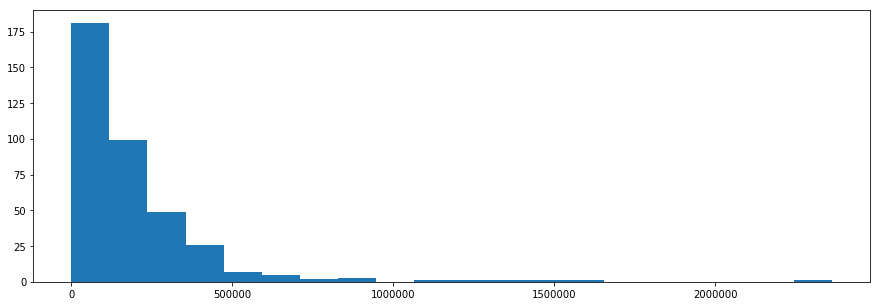

In [27]:
total_ridership = [ridership for ridership, station in traffic_report]
plt.figure(figsize=(15,5))
hist = plt.hist(total_ridership, bins = 20)

In [28]:
import math

log_counts = []
for count in total_ridership:
    try:
        log_result = math.log10(count)
    except:
        pass

    log_counts.append(log_result)

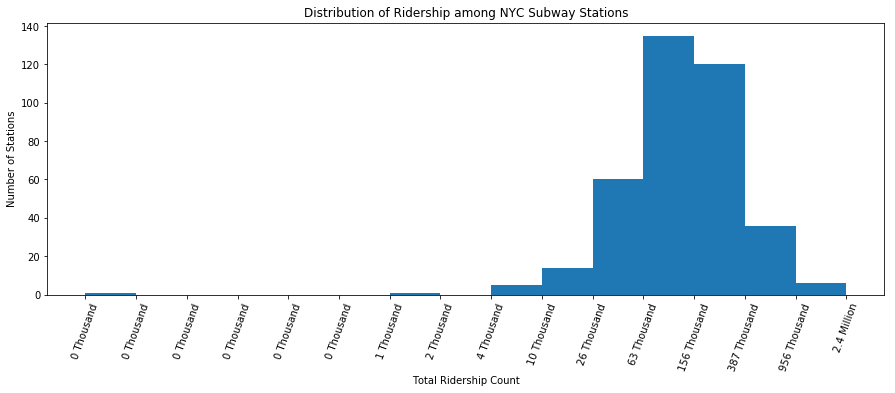

In [29]:
plt.figure(figsize=(15,5))
n, bins, patches = hist = plt.hist(log_counts, bins = 15)

def log_count_to_label(log_count):
    if log_count <= 6:
        return '%0.f Thousand' % 10 ** (log_count - 3)
    else:
        return '%.1f Million' % 10 ** (log_count - 6)
    
tick_labels = map(log_count_to_label, bins)
ticks = plt.xticks(bins, tick_labels, rotation = 70)
plt.xlabel('Total Ridership Count')
plt.ylabel('Number of Stations')
plt.title('Distribution of Ridership among NYC Subway Stations')

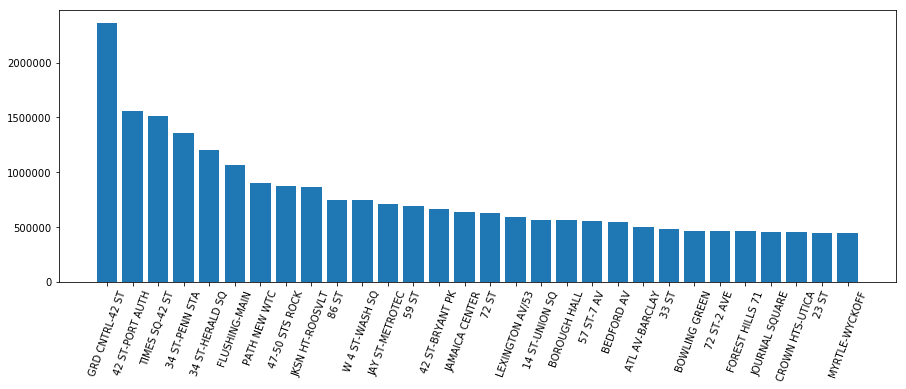

In [30]:
top_stations = sorted(traffic_report, reverse = True)[:30]
counts, stations = zip(*top_stations)
indices = range(len(counts))
plt.figure(figsize=(15,5))
plt.bar(indices, counts)
ticks = plt.xticks(indices, stations, rotation = 70)